In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from os.path import join

In [2]:
df = pd.read_csv(join('data', 'IceCreamData.csv'))
df

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


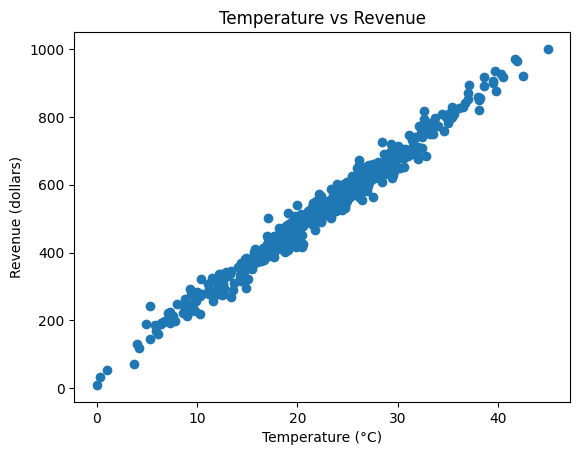

In [3]:
plt.scatter(df['Temperature'], df['Revenue'])
plt.xlabel('Temperature (°C)')
plt.ylabel('Revenue (dollars)')
plt.title('Temperature vs Revenue')
plt.show()

In [4]:
df = df.sample(frac=1, random_state=42)

train_size = int(0.8 * len(df))
train_data = df[:train_size]
test_data = df[train_size:]

X_train = train_data[['Temperature']]
y_train = train_data['Revenue']
X_test = test_data[['Temperature']]
y_test = test_data['Revenue']

X_train_np = train_data['Temperature'].to_numpy()
y_train_np = train_data['Revenue'].to_numpy()

non_zero_mask = X_train_np != 0
X_train_non_zero = X_train_np[non_zero_mask]
y_train_non_zero = y_train_np[non_zero_mask]

multiplier = np.mean(y_train_non_zero / X_train_non_zero)
y_pred_multiplier = multiplier * X_test

model = LinearRegression()
model.fit(X_train, y_train)
y_pred_regression = model.predict(X_test)

mse_multiplier = mean_squared_error(y_test, y_pred_multiplier)
mse_regression = mean_squared_error(y_test, y_pred_regression)

print(f"Mean Squared Error (Multiplier approach): {mse_multiplier:.2f}")
print(f"Mean Squared Error (Linear regression): {mse_regression:.2f}")


Mean Squared Error (Multiplier approach): 1164.70
Mean Squared Error (Linear regression): 591.46
